In [1]:
from netgen.meshing import Mesh as NGMesh # Vorsicht es gibt Mesh auch in ngsolve!
from netgen.meshing import MeshPoint, Pnt, Element1D, Element0D
from ngsolve import *

importing NGSolve-6.2.2104


In [9]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-qv2gc_tc because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
m = NGMesh(dim=1)

# Anzahl Teilintervalle
N = 5

# Punkte für die Zerlegung auf dem Intervall [0,1]
pnums = []
for i in range(0, N+1):
    pnums.append (m.Add (MeshPoint (Pnt(i/N, 0, 0))))

# Jedes 1D-Element (Teilintervall) kann einem Material zugeordnet
# werden. In unserem Fall gibt es nur ein Material.
idx = m.AddRegion("material", dim=1)
for i in range(0,N):
    m.Add (Element1D ([pnums[i],pnums[i+1]], index=idx))

# Linkes und Rechtes Ende sind Randwertpunkte (0D-Elemente)
idx_left = m.AddRegion("left", dim=0)
idx_right = m.AddRegion("right", dim=0)

m.Add (Element0D (pnums[0], index=idx_left))
m.Add (Element0D (pnums[N], index=idx_right))

# Damit haben wir das Mesh definiert
mesh = Mesh(m)

 Update mesh topology
 Update clusters


In [19]:
V = H1(mesh,order = 1, dirichlet='left|right')
#u,v = V.TnT()
u = V.TrialFunction()
v = V.TestFunction()

In [20]:
a = BilinearForm(V)
a += (grad(u)*grad(v))*dx # Steifigkeit
a += -(u*v)*dx # Massenmatrix

In [21]:
f = LinearForm(V)
f += cos(x)*v*dx

In [22]:
a.Assemble()
f.Assemble()

assemble VOL element 5/5                                 


assemble VOL element 5/5                                 


In [23]:
mesh.GetMaterials()

('material',)

In [24]:
mesh.GetBoundaries()

('left', 'right')

In [25]:
ug = CoefficientFunction([-1,1])

In [30]:
gfu = GridFunction(V)
gfu.Set(ug,definedon=mesh.Boundaries('left|right'))

setvalues element 2/2                                 


In [31]:
print(gfu.vec)

      -1
       0
       0
       0
       0
       1




In [36]:
gfu.vec.data += a.mat.Inverse(freedofs=V.FreeDofs())*(f.vec-a.mat*gfu.vec)

call umfpack ... done


In [37]:
xp = np.linspace(0,1,400)
up = np.array([gfu(mesh(xpi)) for xpi in xp])

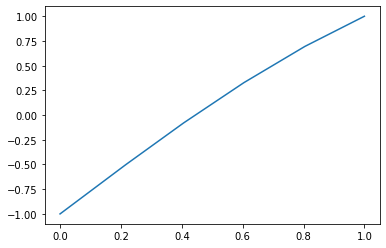

In [38]:
plt.plot(xp,up)